# Imports

In [96]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd

# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md


# Load Dataframe

In [152]:
Occurence_df = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Combined_Dataframe_02032022.csv") 

Occurence_df = set_correct_datatypes(Occurence_df)

Occurence_df

,KeyWord,date,Occurence_in_News,normalized_Occurence_in_News,Occurence_in_Google,Occurence_in_Google_normalized,Occurence_in_Wikipedia,normalized_Occurence_in_Wikipedia
0,Ist,2021-11-07,1,0.25,88,0.88,14,0.076923
1,Ist,2021-11-08,0,0.00,90,0.90,33,0.181319
2,Ist,2021-11-09,0,0.00,93,0.93,23,0.126374
3,Ist,2021-11-10,0,0.00,96,0.96,35,0.192308
4,Ist,2021-11-11,1,0.25,93,0.93,26,0.142857
...,...,...,...,...,...,...,...,...
52404,Handel,2022-02-24,0,0.00,84,0.84,122,0.305764
52405,Handel,2022-02-25,0,0.00,72,0.72,97,0.243108
52406,Handel,2022-02-26,0,0.00,58,0.58,81,0.203008
52407,Handel,2022-02-27,0,0.00,64,0.64,105,0.263158


# Set correct datatypes

In [131]:
def set_correct_datatypes(dataframe):
    dataframe.KeyWord.astype(str)
    dataframe["date"] = pd.to_datetime(dataframe["date"], format='%Y-%m-%d')
    return dataframe


# Visuals

In [195]:
def plot_Occurence_over_time(i_dataframe_o, KeyWord, Occurence_Columns, figsize):
    # copy inputs
    dataframe = i_dataframe_o.copy()
    Occurence_Columns_copy = Occurence_Columns.copy()
    # get all rows by keyword
    dataframe = dataframe.loc[(dataframe["KeyWord"] == KeyWord)]
    Occurence_Columns.extend(["date","KeyWord"])
    dataframe = dataframe[Occurence_Columns]
    dataframe = dataframe.set_index("date")
    
    
    
    fig, ax = plt.subplots(figsize = (15, 7))

    sns.lineplot(ax = ax, data=dataframe).set_title('Occurence over time: ' + KeyWord)

    plt.xlabel('Date')
    plt.ylabel('Occurence')
    
    
    column_1 = dataframe["normalized_Occurence_in_News"]
    for Occurence_Column in Occurence_Columns_copy:
        column_2 = dataframe[Occurence_Column]
        correlation = column_1.corr(column_2)
        print("Correlation between news and "+ Occurence_Column +" is: "+ str(correlation))
        
        
        
    return dataframe
                              


Correlation between news and normalized_Occurence_in_News is: 1.0
Correlation between news and Occurence_in_Google_normalized is: 0.7003192173651559
Correlation between news and normalized_Occurence_in_Wikipedia is: 0.14845325039705015


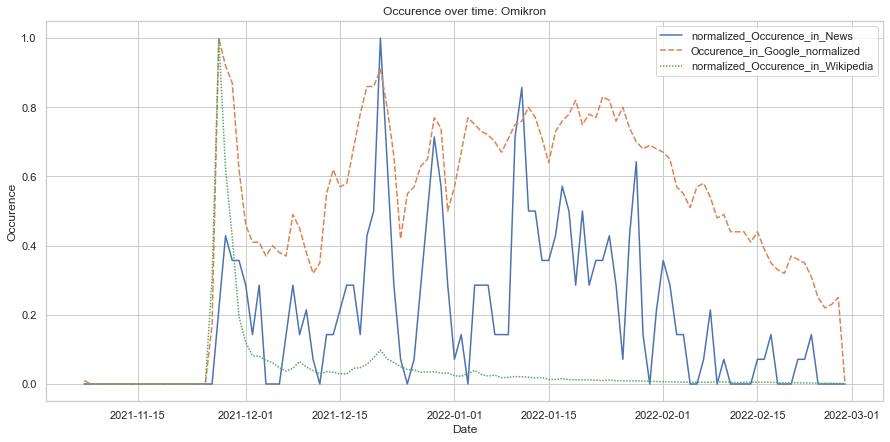

In [198]:
normalized_data = ["normalized_Occurence_in_News","Occurence_in_Google_normalized","normalized_Occurence_in_Wikipedia"]


x = plot_Occurence_over_time(Occurence_df,"Omikron", normalized_data,(20,8))


In [190]:
Occurence_df

,KeyWord,date,Occurence_in_News,normalized_Occurence_in_News,Occurence_in_Google,Occurence_in_Google_normalized,Occurence_in_Wikipedia,normalized_Occurence_in_Wikipedia
0,Ist,2021-11-07,1,0.25,88,0.88,14,0.076923
1,Ist,2021-11-08,0,0.00,90,0.90,33,0.181319
2,Ist,2021-11-09,0,0.00,93,0.93,23,0.126374
3,Ist,2021-11-10,0,0.00,96,0.96,35,0.192308
4,Ist,2021-11-11,1,0.25,93,0.93,26,0.142857
...,...,...,...,...,...,...,...,...
52404,Handel,2022-02-24,0,0.00,84,0.84,122,0.305764
52405,Handel,2022-02-25,0,0.00,72,0.72,97,0.243108
52406,Handel,2022-02-26,0,0.00,58,0.58,81,0.203008
52407,Handel,2022-02-27,0,0.00,64,0.64,105,0.263158
